# Data preparation

In [40]:
# imports
import numpy as np
import os
from code import shape_images as shi

In [41]:
# constants
num_images = 20000
im_dim = 64

### Load the original MATLAB data and display

In [42]:
# data paths
original_data_path = "/home/elena/eStep/XAI/Data/TrianglesAndSquaresRotationScale"

In [43]:
# original filename
original_images_fname = os.path.join(original_data_path,'Polygons_size_64_nr_samples_20000.dat')
original_labels_fname = os.path.join(original_data_path, 'Class_size_64_nr_samples_20000.dat')
print(original_images_fname)
print(original_labels_fname)

/home/elena/eStep/XAI/Data/TrianglesAndSquaresRotationScale/Polygons_size_64_nr_samples_20000.dat
/home/elena/eStep/XAI/Data/TrianglesAndSquaresRotationScale/Class_size_64_nr_samples_20000.dat


In [44]:
# load data
original_images = np.loadtxt(original_images_fname, delimiter=',')

In [45]:
print(original_images.shape)

(20000, 4096)


In [46]:
# load data
original_labels = np.loadtxt(original_labels_fname, delimiter=',')

In [47]:
print(original_labels.shape)

(20000,)


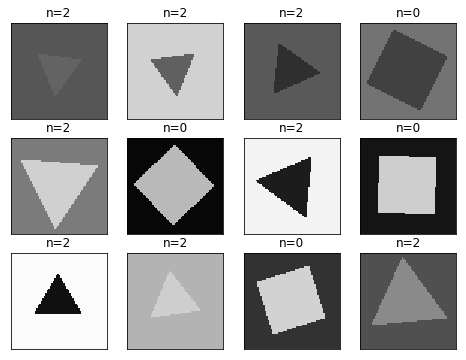

In [48]:
# display 12 random images
shi.plot_12images(original_images, original_labels)

### Replace label 2 = triangle with label 1! Label 0 means square.

In [49]:
labels = np.where(original_labels==2, 1, original_labels)

In [50]:
print(labels.shape)

(20000,)


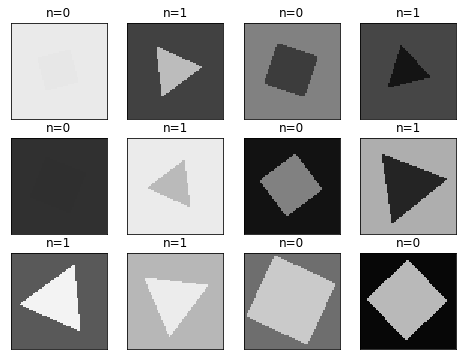

In [51]:
# display 12 random images
shi.plot_12images(original_images, labels)

### Spliting to train, test and validaiton data

In [52]:
# filenames tp save the split data
train_fname = os.path.join(original_data_path, 'split_npz','train_data.npz')
test_fname = os.path.join(original_data_path, 'split_npz','test_data.npz')
val_fname = os.path.join(original_data_path, 'split_npz','validation_data.npz')

In [53]:
# split
images_train, images_val, images_test, labels_train, labels_val, labels_test = shi.split_data(original_images, labels)
print("Size of training data: ", np.shape(images_train), "and labels: ", np.shape(labels_train))
print("Size of validation data: ", np.shape(images_val), "and labels: ", np.shape(labels_val))
print("Size of testing data: ", np.shape(images_test), "and labels: ", np.shape(labels_test))

Size of training data:  (14000, 4096) and labels:  (14000,)
Size of validation data:  (4000, 4096) and labels:  (4000,)
Size of testing data:  (2000, 4096) and labels:  (2000,)


In [54]:
# saving
np.savez(train_fname, images_train=images_train, labels_train=labels_train)
np.savez(val_fname, images_val=images_val, labels_val=labels_val)
np.savez(test_fname, images_test=images_test, labels_test=labels_test)